# ESAA 5기 김혜준 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2021.10.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# Google Colab에 해당하여 생략함

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 불러오기
train = pd.read_csv("movies_train.csv") # 분석은 train.csv 파일만을 이용

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [6]:
print(train.shape)

# pd.DataFrame.shape : 데이터 프레임의 행과 열의 개수가 저장되어 있는 속성

(600, 12)


In [7]:
train.info()

# pd.DataFrame.info() : 열별 정보를 알려주는 함수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [8]:
pd.options.display.float_format = '{:.1f}'.format # 과학적 표현법(e) 사용하지 않고 소수점 첫째 자리까지만 표현

In [9]:
train.describe()

# pd.DataFrame.describe() : 숫자형 열들의 기술 통계량을 보여주는 함수

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [10]:
train.isna().sum() 

# pd.DataFrame.isna().sum() : 데이터 프레임 내 모든 열의 결측치 개수 계산
# True는 1, False는 0로 변환되어 결측치 개수 계산 가능

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- dir_prev_bfnum 변수에 결측값이 존재한다.

In [11]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [12]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [13]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

# pd.DataFrame.fillna() : 결측치를 대신하여 넣고자 하는 값으로 지정한 열의 결측치를 대체하는 함수
# inplace = True : 원본 데이터를 수정 -> 원본 보존 X

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [14]:
train['release_time']=pd.to_datetime(train['release_time'])

# pd.to_datetime() : datetime 오브젝트로 변환하는 함수

## 5) 데이터 시각화 및 분석

### 5-1) 영화 감독별 평균 관객수

#### 사용 변수 : director, box_off_num

In [15]:
# 영화 감독과 관객수를 추출하여 데이터프레임 생성

train_dir_box = train[['director', 'box_off_num']]
train_dir_box.info()
train_dir_box.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   director     600 non-null    object
 1   box_off_num  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


,director,box_off_num
0,조병옥,23398
1,우민호,7072501
2,장철수,6959083
3,구자홍,217866
4,신근호,483387


In [16]:
print(train_dir_box.director.is_unique) # False

# 한 명의 영화 감독이 여러 영화를 만든 경우가 존재 -> 감독별로 groupby 필요

False


In [17]:
train_dir_box.groupby('director').mean().sort_values('box_off_num', ascending = False)

# 영화 감독별로 groupby하여 평균 관객수 계산하고 내림차순 정렬

,box_off_num
director,
윤제균,14262766.0
최동훈,12845252.0
양우석,11374879.0
봉준호,9350351.0
한재림,9135806.0
...,...
진광교,36.0
이세일,10.0
고구마,8.0


- 윤제균, 최동훈, 양우석, 봉준호, 한재림 감독 순으로 평균 관객수가 많다.

### 5-2) 영화 개봉 요일별 평균 관객수
#### 사용 변수 : release_time, box_off_num

In [18]:
# release_time에서 요일 추출

train['release_weekday'] = train['release_time'].dt.day_name() # dt접근자 활용

# day_name() : 요일을 문자열로 추출

In [19]:
# 영화 제목, 감독, 개봉 요일과 관객수를 추출하여 데이터프레임 생성

train_weekday_box = train[['title', 'director', 'release_weekday', 'box_off_num']]
train_weekday_box.info()
train_weekday_box.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            600 non-null    object
 1   director         600 non-null    object
 2   release_weekday  600 non-null    object
 3   box_off_num      600 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.9+ KB


,title,director,release_weekday,box_off_num
0,개들의 전쟁,조병옥,Thursday,23398
1,내부자들,우민호,Thursday,7072501
2,은밀하게 위대하게,장철수,Wednesday,6959083
3,나는 공무원이다,구자홍,Thursday,217866
4,불량남녀,신근호,Thursday,483387


In [20]:
train_weekday_box.groupby('release_weekday').count()

# 요일별 개봉 영화 수 계산

,title,director,box_off_num
release_weekday,,,
Friday,2,2,2
Monday,4,4,4
Saturday,1,1,1
Thursday,484,484,484
Tuesday,2,2,2
Wednesday,107,107,107


- 목요일에 가장 많은 영화가 개봉했고, 수요일이 그 뒤를 이었다. 그리고 월, 화, 금, 토요일에 개봉한 영화는 소수이다. 이때, 일요일에 개봉한 영화는 없다.
- 보통 목요일에 영화를 개봉하는 관례에 의한 결과라고 볼 수 있다. 몇몇 다른 요일에 개봉한 경우는 휴일이나 연휴를 고려한 것이라고 해석할 수 있다.

In [21]:
train_weekday_box.groupby('release_weekday').mean().sort_values('box_off_num', ascending = False)

# 요일별로 groupby하여 평균 관객수 계산하고 내림차순 정렬

,box_off_num
release_weekday,
Tuesday,2591569.0
Wednesday,2237699.1
Thursday,372299.0
Friday,48651.0
Monday,434.0
Saturday,353.0


- 개봉 요일이 화, 수, 목, 금, 월, 토요일인 순으로 평균 관객수가 많다.

<AxesSubplot:xlabel='release_weekday'>

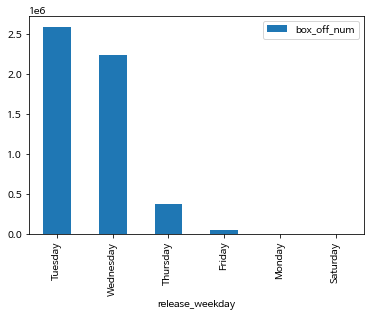

In [22]:
# 영화 개봉 요일별 평균 관객수 막대 그래프 그리기

train_weekday_box.groupby('release_weekday').mean().sort_values('box_off_num', ascending=False).plot(kind = 'bar')

In [23]:
train_weekday_box[train_weekday_box['release_weekday'] == 'Tuesday'] # 화요일에 개봉한 영화

,title,director,release_weekday,box_off_num
288,타워,김지훈,Tuesday,5181014
302,원 나잇 스탠드,민용근,Tuesday,2124


- 화요일에 2개의 영화 밖에 개봉하지 않았으므로, 평균 관객수를 해석할 때 주의가 필요하다.
- '타워'라는 영화의 높은 관객수로 인해 화요일의 평균 관객수가 가장 높게 나타났음을 알 수 있다.

### 5-3) 영화 장르별 평균 주연 배우 수
#### 사용 변수: genre, num_actor

In [24]:
# 영화 장르와 주연 배우 수를 추출하여 데이터프레임 생성

train_genre_actor = train[['genre', 'num_actor']]
train_genre_actor.info()
train_genre_actor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre      600 non-null    object
 1   num_actor  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


,genre,num_actor
0,액션,2
1,느와르,3
2,액션,4
3,코미디,6
4,코미디,2


In [25]:
train_genre_actor.groupby('genre').mean().sort_values('num_actor', ascending = False)

# 영화 장르별로 groupby하여 평균 주연 배우 수 계산하고 내림차순 정렬

,num_actor
genre,
애니메이션,5.7
코미디,4.7
공포,3.9
SF,3.7
드라마,3.6
액션,3.6
느와르,3.6
멜로/로맨스,3.4
다큐멘터리,3.3


Text(0, 0.5, '평균 주연 배우 수')

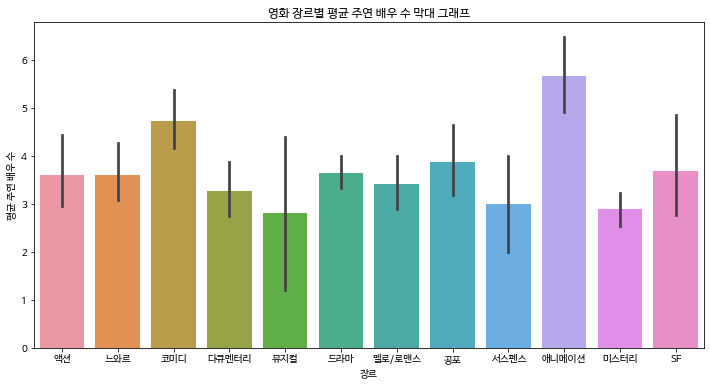

In [26]:
# 영화 장르별 평균 주연 배우 수 막대 그래프 그리기

ax = plt.subplots(figsize = (12, 6))
ax = sns.barplot(x = 'genre', y = 'num_actor', data = train_genre_actor)
ax.set_title("영화 장르별 평균 주연 배우 수 막대 그래프")
ax.set_xlabel("장르")
ax.set_ylabel("평균 주연 배우 수")

- 애니메이션, 코미디, 공포, SF, 드라마 등의 순서로 평균 주연 배우가 많다. 가장 평균 주연 배우 수가 적은 장르는 뮤지컬이다.

### 5-4) 상위 5개 배급사별 가장 선호하는 영화 장르
#### 사용 변수: distributor, genre

In [27]:
# 영화 배급사와 장르를 추출하여 데이터프레임 생성

train_dist_genre = train[['distributor', 'genre']]
train_dist_genre.info()
train_dist_genre.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  600 non-null    object
 1   genre        600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


,distributor,genre
0,롯데엔터테인먼트,액션
1,(주)쇼박스,느와르
2,(주)쇼박스,액션
3,(주)NEW,코미디
4,쇼박스(주)미디어플렉스,코미디


In [28]:
train_dist_genre.groupby(['distributor']).count().sort_values('genre', ascending = False)

# 배급사별 배급한 영화 개수 계산하여 내림차순 정렬

,genre
distributor,
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
(주)쇼박스,26
...,...
새인컴퍼니,1
상구네 필름,1
사람과 사람들,1


- CJ 엔터테인먼트, 롯데엔터테인먼트, (주)NEW, (주)마운틴픽쳐스, (주)쇼박스 순으로 많은 영화를 배급했다.

In [29]:
# 상위 5개 배급사 데이터만 추출

top_5_dist = train[(train['distributor'] == 'CJ 엔터테인먼트')|(train['distributor'] == '롯데엔터테인먼트')|(train['distributor'] == '(주)NEW')|(train['distributor'] == '(주)마운틴픽쳐스')|(train['distributor'] == '(주)쇼박스')]
top_5_dist.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,Thursday
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,Thursday
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,Wednesday
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,Thursday
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,Thursday


In [107]:
# 상위 5개 배급사 데이터에서 영화 장르와 배급사를 추출하여 데이터프레임 생성

top_5_dist_2 = top_5_dist[['distributor', 'genre', 'title']]
top_5_dist_2.head()

,distributor,genre,title
0,롯데엔터테인먼트,액션,개들의 전쟁
1,(주)쇼박스,느와르,내부자들
2,(주)쇼박스,액션,은밀하게 위대하게
3,(주)NEW,코미디,나는 공무원이다
5,롯데엔터테인먼트,코미디,강철대오 : 구국의 철가방


In [125]:
top_5_dist_2.groupby(['distributor', 'genre']).count().sort_values('title', ascending = False)

# 각 배급사에서 장르별 영화 수 계산

title
distributor genre        
CJ 엔터테인먼트   드라마        20
(주)NEW      드라마        16
롯데엔터테인먼트    드라마        14
(주)마운틴픽쳐스   드라마        11
(주)쇼박스      드라마         8
            느와르         8
(주)마운틴픽쳐스   다큐멘터리       8
롯데엔터테인먼트    코미디         8
            멜로/로맨스      8
CJ 엔터테인먼트   멜로/로맨스      6
롯데엔터테인먼트    공포          6
(주)마운틴픽쳐스   멜로/로맨스      5
CJ 엔터테인먼트   코미디         5
            공포          5
롯데엔터테인먼트    액션          5
(주)쇼박스      액션          5
CJ 엔터테인먼트   느와르         4
            액션          4
            애니메이션       4
            SF          3
(주)NEW      코미디         3
CJ 엔터테인먼트   미스터리        3
롯데엔터테인먼트    느와르         3
            미스터리        3
            애니메이션       3
(주)쇼박스      코미디         2
(주)NEW      공포          2
(주)쇼박스      멜로/로맨스      2
(주)마운틴픽쳐스   코미디         2
            미스터리        2
(주)NEW      액션          2
            멜로/로맨스      2
            느와르         2
(주)쇼박스      공포          1
롯데엔터테인먼트    SF          1
(주)마운틴픽쳐스   공포          1
롯데엔터테인먼트    다큐멘터리       1
(주)NEW      애니메이션       1
            다큐멘터리       1
            SF          1

- CJ 엔터테인먼트, 롯데엔터테인먼트, (주)NEW, (주)마운틴픽쳐스, (주)쇼박스 모두 '드라마' 장르의 영화를 가장 많이 배급했음을 확인할 수 있다.

### 5-5) 스텝수와 관객수 사이의 관계
#### 사용 변수: num_staff, box_off_num

In [31]:
print(train['num_staff'].min()) # 가장 적은 스텝수 : 0명
print(train['num_staff'].max()) # 가장 많은 스텝수 : 869명

0
869


In [32]:
# 스텝수에 따라 내림차순으로 정렬 - 상위 5개

train.sort_values('num_staff', ascending = False).head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.0,0,869,4,14262766,Wednesday
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1843894.7,3,868,2,8666208,Wednesday
201,강남 1970,(주)쇼박스,액션,2015-01-21,135,청소년 관람불가,유하,1949111.0,4,719,3,2192276,Wednesday
320,최종병기 활,롯데엔터테인먼트,액션,2011-08-10,122,15세 관람가,김한민,2079989.0,1,687,4,7482180,Wednesday
477,황해,(주)쇼박스,느와르,2010-12-22,156,청소년 관람불가,나홍진,5046096.0,1,683,3,2260512,Wednesday


In [33]:
# 스텝수에 따라 내림차순으로 정렬 - 하위 5개

train.sort_values('num_staff', ascending = False).tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
290,훈장과 악동들,어뮤즈,다큐멘터리,2011-10-27,92,전체 관람가,김봉곤,0.0,0,0,1,39916,Thursday
553,미라클 여행기,미라클 필름,다큐멘터리,2015-01-15,84,전체 관람가,허철,0.0,0,0,1,3399,Thursday
554,위험한 섹스,(주) 케이알씨지,멜로/로맨스,2015-09-23,72,청소년 관람불가,이전,0.0,0,0,1,419,Wednesday
283,착한 처제,쟈비스미디어,드라마,2015-11-19,97,청소년 관람불가,강훈,0.0,0,0,2,588,Thursday
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.0,1,0,3,4122,Thursday


In [34]:
print(train['box_off_num'].min()) # 가장 적은 관객수 : 1명
print(train['box_off_num'].max()) # 가장 많은 관객수 : 14262766명

1
14262766


In [35]:
# 관객수에 따라 내림차순으로 정렬 - 상위 5개

train.sort_values('box_off_num', ascending = False).head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.0,0,869,4,14262766,Wednesday
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2564691.7,3,462,10,12983841,Wednesday
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,819049.5,2,300,8,12811435,Wednesday
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5169479.0,4,628,3,12706663,Wednesday
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1552541.0,2,402,3,12323595,Thursday


In [36]:
# 관객수에 따라 내림차순으로 정렬 - 하위 5개

train.sort_values('box_off_num', ascending = False).tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_weekday
481,려수,(주) 영화사조제,드라마,2011-11-10,98,15세 관람가,진광교,0.0,0,1,2,36,Thursday
410,전망 좋은 방-밀애,(주) 케이알씨지,멜로/로맨스,2012-11-08,71,청소년 관람불가,이세일,0.0,0,0,3,10,Thursday
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,17615314.0,1,27,3,8,Thursday
324,청아,인피니티엔터테인먼트,드라마,2014-09-25,92,청소년 관람불가,김정호,0.0,0,3,4,2,Thursday
432,젊은 엄마 2,골든타이드픽처스,멜로/로맨스,2014-05-29,89,청소년 관람불가,노성수,0.0,0,0,1,1,Thursday


Text(0, 0.5, '관객수')

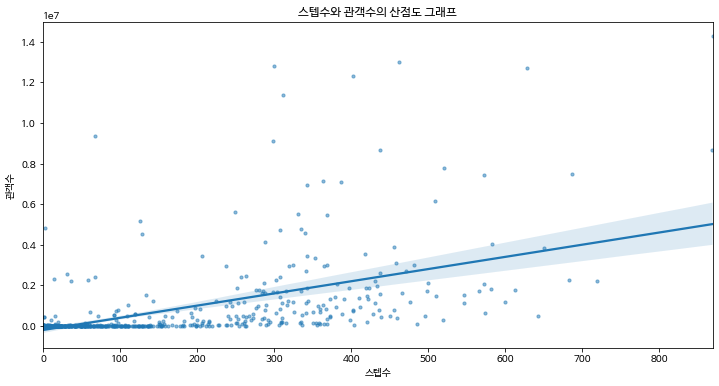

In [37]:
# 스텝수와 관객수 사이의 관계를 보기 위한 산점도 그래프 그리기

ax = plt.subplots(figsize = (12, 6))
ax = sns.regplot(x = 'num_staff', y = 'box_off_num', data = train, scatter_kws = {'s': 10, 'alpha': 0.5})
ax.set_title("스텝수와 관객수의 산점도 그래프")
ax.set_xlabel("스텝수")
ax.set_ylabel("관객수")

- 산점도 그래프를 통해 스텝수가 증가하면 대체적으로 관객수가 증가하는 경향성을 확인할 수 있다. 회귀선 또한 양의 기울기를 갖는다.

In [38]:
# 스텝수와 관객수의 상관계수 계산

train['num_staff'].corr(train['box_off_num'], method='pearson') # 두 개의 열 상관계수 계산

0.5442647163889159

- 상관계수를 구해보면 + 0.54의 값이 나온다. 따라서 스텝수와 관객수는 뚜렷한 양의 상관관계를 가짐을 알 수 있다.
- 스텝수가 많은 경우는 제작비가 많이 들어가는 상업영화이므로, 보통 스텝수가 적은 독립영화에 비해 관객수가 많다고 해석할 수 있다.